# 4.4 Exercises
## Dichotomous IRT
We will now solve a few exercises on Item Response Theory with Dichotomous Data.

## 1️⃣ Dimensionality assessment
**Instructions:**
- Download and load the dataset
- Test unidimensionality on the addition items of the `zareki` dataset.
- What conclusion can you draw from the results of the analysis?
- Is there any items that seems to violate unidimentionality? If so, remove it and run the analysis again, what has changed?

In [10]:
# Imports
import numpy as np
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri, numpy2ri
from rpy2.robjects.packages import importr

# Miscellaneous
pandas2ri.activate()
numpy2ri.activate()
ro.r('set.seed(123)')
%load_ext rpy2.ipython

c:\Users\maku1542\AppData\Local\miniconda3\envs\psy126\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [ ]:
# Data handling

# Princals

# EFA tetrachoric correlation

# ICA

## 2️⃣: The Rasch model
**Instructions:**
- Analyse the item parameters of a Rasch model
    - Assess general model fit
    - Assess misfit at the item level
    - Clean the dataset and re-fit the Rasch model
    - Interpret the result
- Plot the item response functions (ICC)

### Exercise 1: Running linear regression in R and Python

Use the `sunspots` dataset to run a linear regression of `SUNACTIVITY` on `YEAR` in **both** Python and R using `rpy2`.

- Compare the R² and p-values from both outputs.
- Are the coefficients the same?


In [1]:
# Python regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

sunspots = sm.datasets.sunspots.load_pandas().data
model_py = smf.ols('SUNACTIVITY ~ YEAR', data=sunspots).fit()
print(model_py.summary())

# R regression
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()
ro.globalenv['sunspots_data'] = sunspots
ro.r('model <- lm(SUNACTIVITY ~ YEAR, data=sunspots_data)')
print(ro.r("summary(model)"))


                            OLS Regression Results                            
Dep. Variable:            SUNACTIVITY   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     15.35
Date:                Thu, 22 May 2025   Prob (F-statistic):           0.000110
Time:                        12:59:17   Log-Likelihood:                -1573.8
No. Observations:                 309   AIC:                             3152.
Df Residuals:                     307   BIC:                             3159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -133.4203     46.809     -2.850      0.0

### Exercise 2: Working with R objects

Use `rpy2` to extract the **coefficients**, **residuals**, and **fitted values** from the R model you built in Exercise 1.

- Convert them to Python and plot the residuals over time.


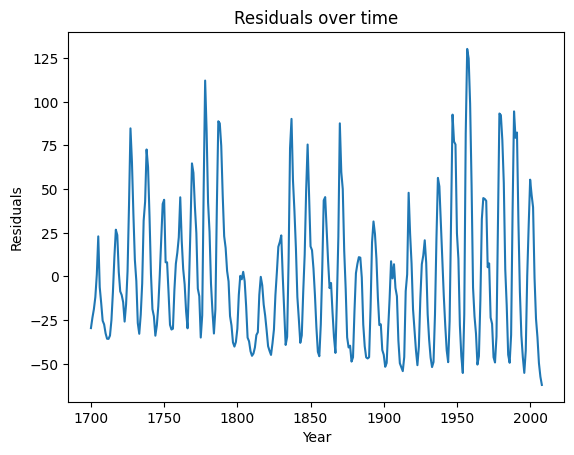

In [2]:
# Extract from R
coefs = ro.r("coef(model)")
residuals = ro.r("residuals(model)")
fitted = ro.r("fitted.values(model)")

import matplotlib.pyplot as plt
plt.plot(sunspots['YEAR'], list(residuals))
plt.title("Residuals over time")
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.show()


### Exercise 3: Item structure visualization

Using the `zarsub` dataset, perform a **2D Princals** analysis with `princals()`.

- Plot the items in 2D space.
- Identify which item is furthest from the main cluster.
- What might that imply about its dimensionality?


In [12]:
# Run Princals in R
from rpy2.robjects.packages import importr
importr("Gifi")
importr("MPsychoR")
ro.r("data(zareki)")
zareki = pandas2ri.rpy2py(ro.globalenv['zareki'])
zarsub = zareki.loc[:, zareki.columns.str.startswith("subtr")]
ro.globalenv['zarsub'] = zarsub
ro.r("prinzar <- princals(zarsub)")


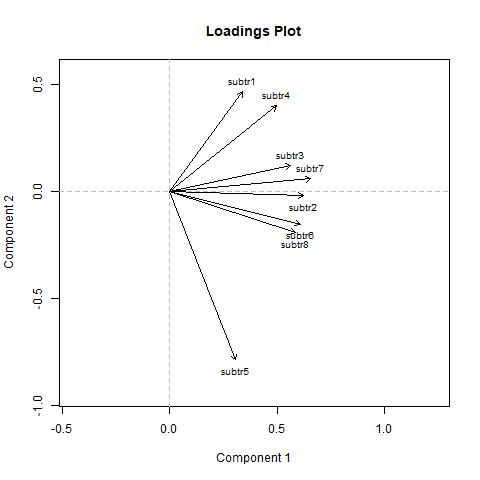

In [13]:
%%R
plot(prinzar)

### Exercise 4: Removing problematic items

Remove the item you identified in Exercise 3 (e.g., `subtr5`) and rerun the Princals analysis.

- How does the item clustering change?
- Comment on whether unidimensionality improves.


In [ ]:
# Remove subtr5 and re-plot
zarsub2 = zarsub.drop("subtr5", axis=1)
ro.globalenv['zarsub2'] = zarsub2
ro.r("prinzar2 <- princals(zarsub2)")
ro.r("plot(prinzar2)")

### Exercise 5: Rasch modeling

Fit a Rasch model using the `RM()` function on the full subtraction item set `zarsub`.

- Plot the difficulty parameters.
- Identify the easiest and most difficult items.


In [14]:
# Rasch model
importr("eRm")
ro.globalenv['zarsub'] = zarsub
ro.r("rasch_model <- RM(zarsub)")
print(ro.r("coef(rasch_model)"))

[ 1.9463633   0.75529975 -1.68083301  0.47740693  0.28054298 -0.41632644
 -1.55086768  0.18841416]


### Exercise 6: Testing measurement invariance

Using the variable `time` (fast vs slow), perform an LR test on the Rasch model to check for invariance across groups.

- Interpret the result of the LR test.
- What does this say about the fit of the model?


In [15]:
# LR Test
zareki["timecat"] = ["fast" if t > zareki["time"].median() else "slow" for t in zareki["time"]]
timecat = pd.Categorical(zareki["timecat"], categories=["fast", "slow"])
ro.globalenv["timecat"] = timecat
ro.r("lrt_result <- LRtest(rasch_model, timecat)")
print(ro.r("lrt_result"))


Andersen LR-test: 
LR-value: 24.097 
Chi-square df: 7 
p-value:  0.001 


